In [ ]:
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [ ]:
path2 = ('mock_v2.nc')
#data1 = xr.open_dataset(path2, decode_times=False) #To view the date as integers of 0, 1, 2,....
data = xr.open_dataset(path2) # To view time in datetime format
data
#data5['time']

In [ ]:
data

In [4]:
!pip install "dask[dataframe]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import dask.dataframe as dd

In [6]:
dask_df = data.to_dask_dataframe(dim_order=None, set_index=False)

In [7]:
dd = dask_df.compute()

In [10]:
# For mock data
sst_data_trans = pd.DataFrame()
t2m_data_trans = pd.DataFrame()
#v10_data_trans = pd.DataFrame()
#u10_data_trans = pd.DataFrame()
#sp_data_trans = pd.DataFrame()
#sshf_data_trans = pd.DataFrame()
#slhf_data_trans = pd.DataFrame()

for i in range(0,dd.shape[0]):
  b=('sst'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')
  c=('t2m'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')
  #d=('v10'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #e=('u10'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #f=('sp'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #g=('sshf'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')
  #h=('slhf'+'('+str(dd.latitude[i])+','+str(dd.longitude[i])+')')

  sst_data_trans.loc[dd.time[i], b] = dd.sst[i]
  t2m_data_trans.loc[dd.time[i], c] = dd.t2m[i]
  #v10_data_trans.loc[dd.time[i], d] = dd.v10[i]
  #u10_data_trans.loc[dd.time[i], e] = dd.u10[i]
  #sp_data_trans.loc[dd.time[i], f] = dd.sp[i]
  #sshf_data_trans.loc[dd.time[i], g] = dd.sshf[i]
  #slhf_data_trans.loc[dd.time[i], h] = dd.slhf[i]
  
  

In [11]:
trans_concat = pd.concat([ t2m_data_trans, sst_data_trans ], axis=1)

In [12]:
trans_concat

,"t2m(0,0)","t2m(0,1)","t2m(0,2)","t2m(0,3)","t2m(0,4)","t2m(0,5)","t2m(0,6)","t2m(0,7)","t2m(0,8)","t2m(0,9)",...,"sst(9,0)","sst(9,1)","sst(9,2)","sst(9,3)","sst(9,4)","sst(9,5)","sst(9,6)","sst(9,7)","sst(9,8)","sst(9,9)"
0,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
1,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
2,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
3,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
4,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
5,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
6,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
7,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
8,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0
9,2.5,2.5,2.5,2.5,2.5,2.5,10.0,10.0,10.0,10.0,...,0.5,0.5,0.5,0.5,0.5,0.5,2.0,2.0,2.0,2.0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
trans_concat_scaled = scaler.fit_transform(trans_concat)

# statistics of scaled data
pd.DataFrame(trans_concat_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,...,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978,1.025978
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(trans_concat_scaled)

KMeans(n_clusters=2)

In [20]:
# inertia on the fitted data
kmeans.inertia_

0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ConvergenceWarni

Text(0, 0.5, 'Inertia')

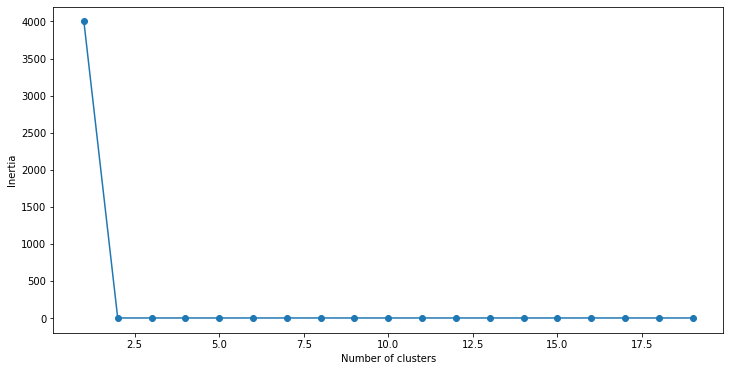

In [21]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(trans_concat_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [37]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(trans_concat_scaled)
pred = kmeans.predict(trans_concat_scaled)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
frame = pd.DataFrame(trans_concat_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    10
0    10
Name: cluster, dtype: int64

In [45]:
frame

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,cluster
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


In [39]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

#Caculate RMSE between 2 days

In [69]:
diff = frame.iloc[[0]] - frame.iloc[[1]]
Sq_diff = (diff**2)
Sq_diff

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,cluster
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
Sq_diff_sum = sum(map(sum, Sq_diff.to_numpy()))
Sqrt_diff_sum = np.sqrt(Sq_diff_sum)
print("RMSE between frame.iloc[[0]] and frame.iloc[[1]]:", Sqrt_diff_sum)

RMSE between frame.iloc[[0]] and frame.iloc[[1]]: nan


In [84]:
def rmse_2d(day1, day2):
  diff = np.array(day1) - np.array(day2)
  Sq_diff = np.square(diff)
  Sq_diff_mean = Sq_diff.mean()
  score= np.sqrt(Sq_diff_mean)
  return score

In [ ]:
    """
    Examples(rounded for precision):
    >>> actual = [1,2,3];predict = [1,4,3]
    >>> np.around(rmse(predict,actual),decimals = 2)
    1.15
    >>> actual = [1,1,1];predict = [1,1,1]
    >>> rmse(predict,actual)
    0.0
    """
    predict = np.array(predict)
    actual = np.array(actual)

    difference = predict - actual
    square_diff = np.square(difference)
    mean_square_diff = square_diff.mean()
    score = np.sqrt(mean_square_diff)

#Intra Cluster RMSE

In [80]:
mean_frame_1 = np.mean(frame.iloc[0:199], axis=0)
mean_frame_1

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
196        0.0
197        0.0
198        0.0
199        0.0
cluster    0.5
Length: 201, dtype: float64

In [87]:
intra_rmse_value = 0.0
for i in range(len(frame.iloc[0:199])):
  intra_rmse_value += rmse_2d(frame.iloc[0:199], mean_frame_1)
print(i)
print("RMSE among frame[0:199]:", intra_rmse_value/(i+1))

19
RMSE among frame[0:199]: 0.9981325847383291


For n_clusters = 2 The average silhouette_score is : 1.0
For n_clusters = 3 The average silhouette_score is : 1.0
For n_clusters = 4 The average silhouette_score is : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 5 The average silhouette_score is : 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1255: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


For n_clusters = 6 The average silhouette_score is : 1.0


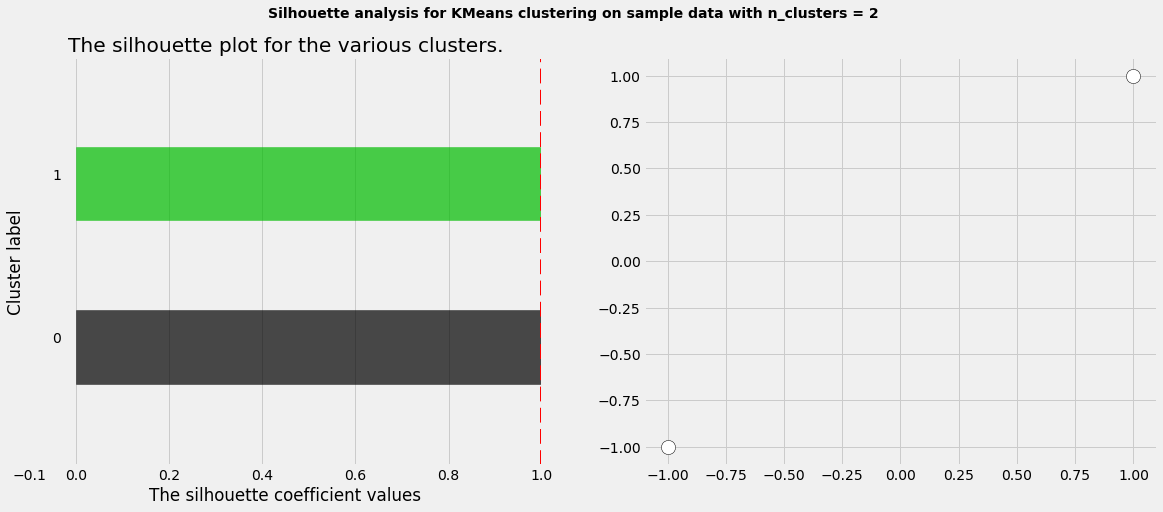

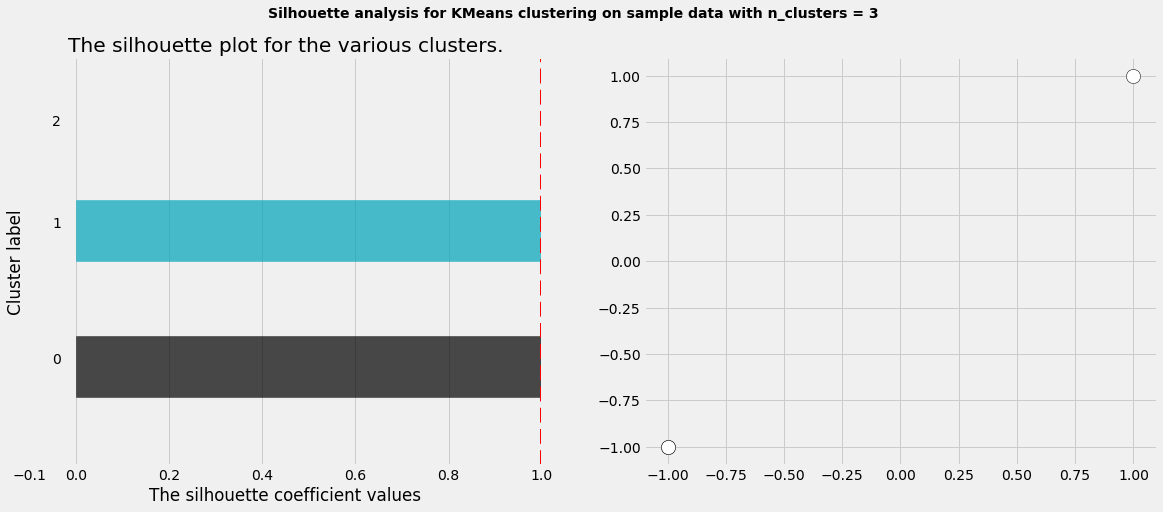

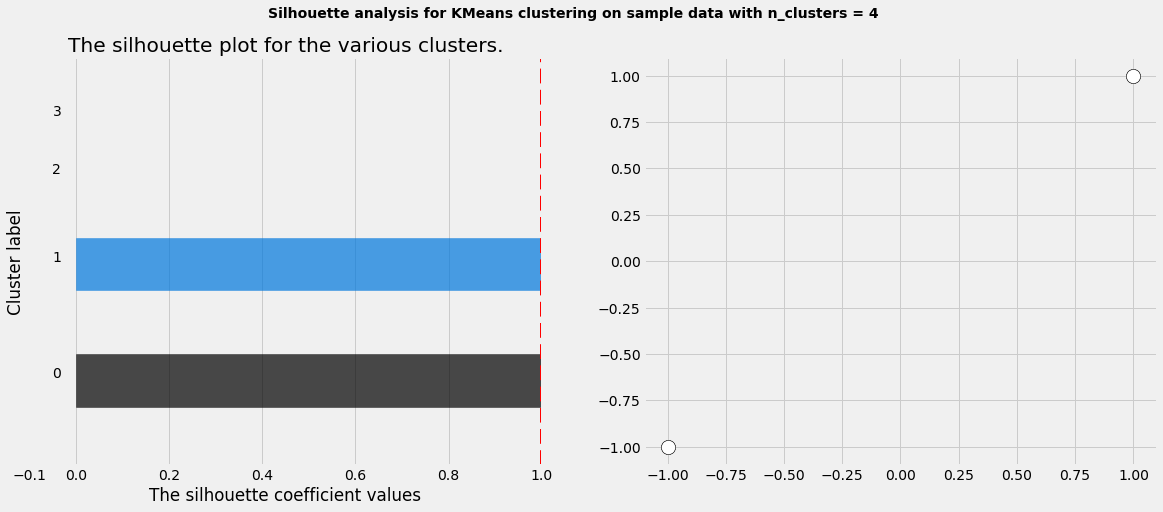

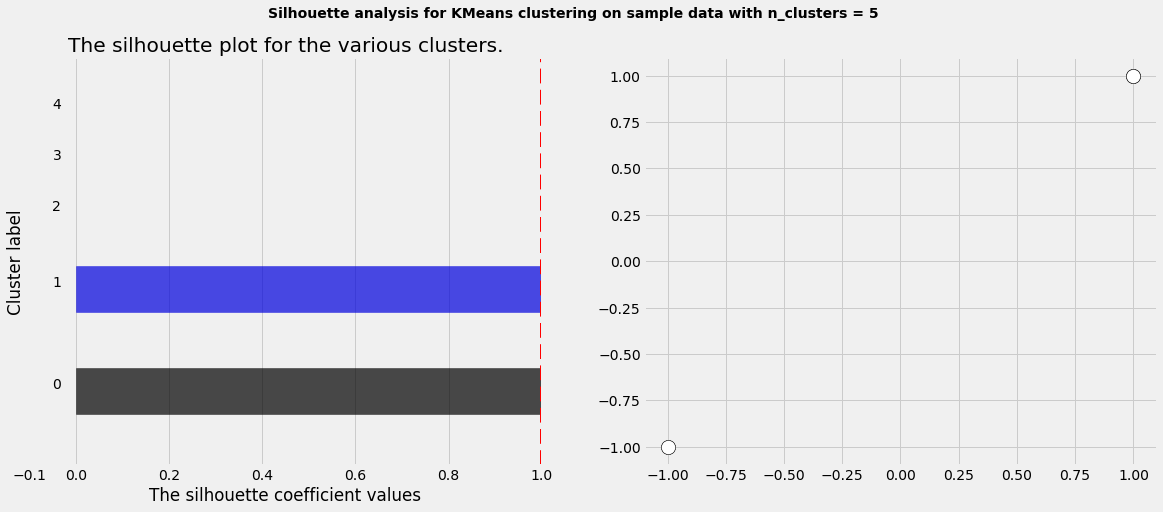

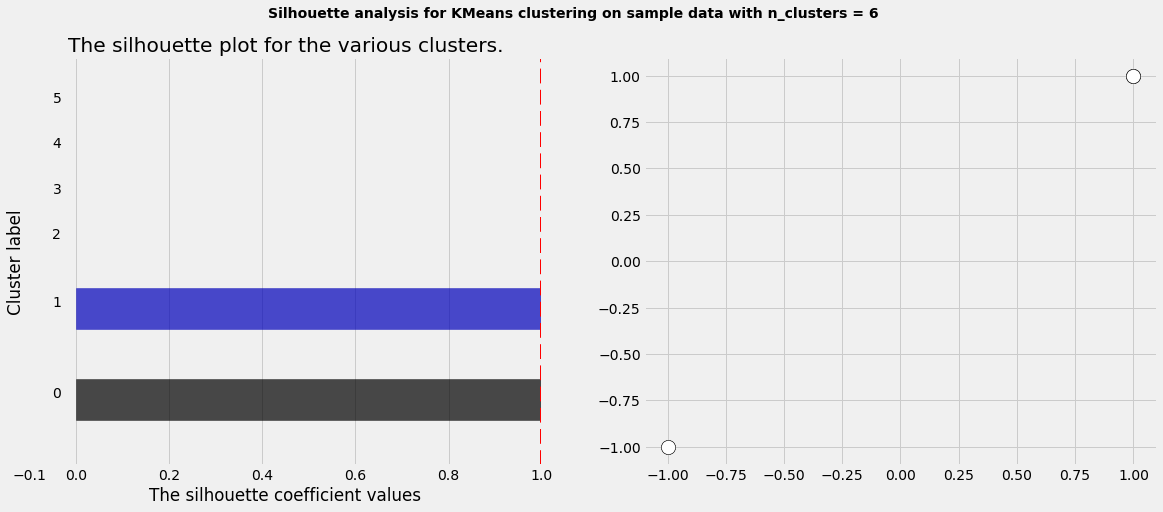

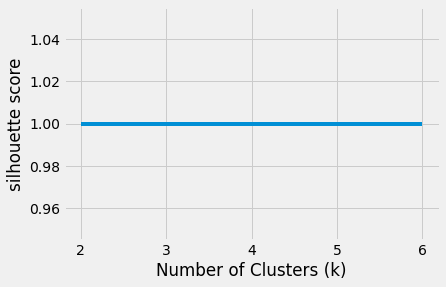

In [90]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []
X=trans_concat_scaled
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
     #   ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
      #              s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()